In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#homework - module 9, assignment 1

#load customers data (customers.csv)

df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#check the number of cells and rows:



df.shape

(200, 5)

In [4]:
#check the number of cells in each column with null values:

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# create scatter plot with Age as X and Spending Score as Y:

#x=df['Age']

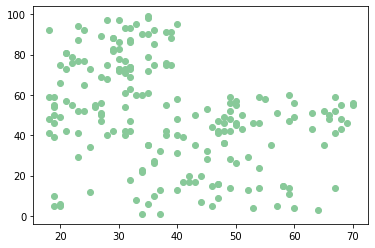

In [9]:
x=df['Age']
y=df['Spending Score (1-100)']
plt.scatter(x,y,color='#88c999')
plt.show()

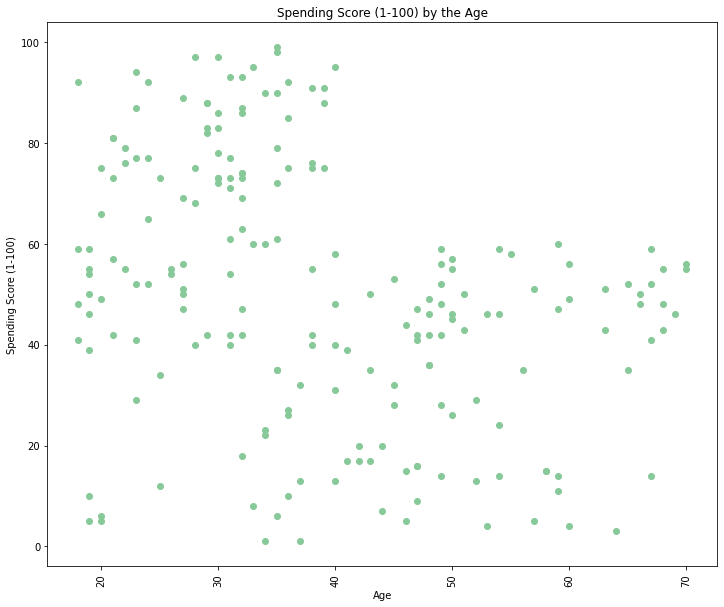

In [67]:
plt.figure(figsize=(12,10))

x=df['Age']
y=df['Spending Score (1-100)']
plt.scatter(x,y,color='#88c999')
plt.title('Spending Score (1-100) by the Age')
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
#Draw scatter plot displaying data points colored on the basis on clusters:



In [24]:
X1= df.iloc[:,2:4]
Y1= df.iloc[:,-1]

In [26]:
#X1

In [21]:
#Y1

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(criterion='entropy', random_state=1)
tree.fit(X1, Y1)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [28]:
imp= pd.DataFrame(index=X1.columns, data=tree.feature_importances_, columns=['Imp'] )
imp.sort_values(by='Imp', ascending=False)

,Imp
Annual Income (k$),0.509618
Age,0.490382


In [ ]:
#module 9 - assignment 02 - k-means clustering, customers.csv
#find out the best number of clusters between 1 and 10 using the elbow method:

In [29]:
main_features=df[['Annual Income (k$)', 'Age']]

In [34]:
X=df[['Annual Income (k$)', 'Age']]
#X

In [30]:
Y= df.iloc[:,0]

In [37]:
from sklearn.cluster import KMeans
#using elbow method to find no of clusters
wcss=[]
for i in range(1,7):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [38]:
print(wcss)

[176108.77999999997, 87121.56591478694, 59486.961439280356, 39502.778500645385, 31671.84724523847, 25527.59998334999]


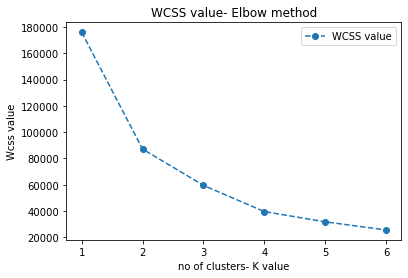

In [39]:
plt.plot(range(1,7), wcss, linestyle='--', marker='o', label='WCSS value')
plt.title('WCSS value- Elbow method')
plt.xlabel('no of clusters- K value')
plt.ylabel('Wcss value')
plt.legend()
plt.show()

In [ ]:
#as we can imply from the above graph, the best number of clusters is 5:

In [40]:
kmeans= KMeans(n_clusters=5, random_state=1)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=1)

In [41]:
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 3, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [42]:
kmeans.cluster_centers_

array([[ 78.15517241,  38.25862069],
       [ 27.07142857,  30.21428571],
       [109.7       ,  36.6       ],
       [ 49.06122449,  56.59183673],
       [ 59.48387097,  25.06451613]])

In [43]:
df['cluster']=kmeans.predict(X)
df.sort_values(by='cluster').head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
117,118,Female,49,65,59,0
154,155,Female,47,78,16,0
155,156,Female,27,78,89,0
156,157,Male,37,78,1,0
157,158,Female,30,78,78,0


In [44]:
df.cluster.unique()

array([1, 3, 4, 0, 2], dtype=int32)

In [51]:
#cluster_0_df=df[(df['cluster']==0)]
#cluster_0_df

In [52]:
#cluster_1_df=df[(df['cluster']==1)]
#cluster_1_df

In [53]:
#cluster_2_df=df[(df['cluster']==2)]
#cluster_2_df

In [54]:
#cluster_3_df=df[(df['cluster']==3)]
#cluster_3_df

In [50]:
#cluster_4_df=df[(df['cluster']==4)]
#cluster_4_df

In [57]:
X2=df[['Annual Income (k$)', 'Age']]
Y2= df.iloc[:,-1]
from sklearn.cluster import KMeans
#using elbow method to find no of clusters
wcss=[]
for i in range(1,7):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

In [58]:
print(wcss)

[176108.77999999997, 87121.56591478694, 59486.961439280356, 39502.778500645385, 31671.84724523847, 25527.59998334999]


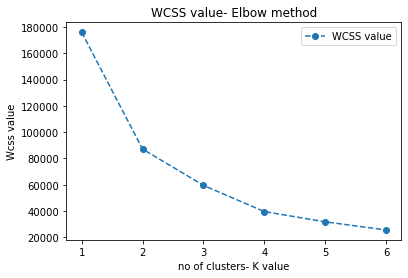

In [59]:
plt.plot(range(1,7), wcss, linestyle='--', marker='o', label='WCSS value')
plt.title('WCSS value- Elbow method')
plt.xlabel('no of clusters- K value')
plt.ylabel('Wcss value')
plt.legend()
plt.show()

In [61]:
kmeans= KMeans(n_clusters=5, random_state=1)
kmeans.fit(X2)

KMeans(n_clusters=5, random_state=1)

In [62]:
kmeans.predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 3, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [63]:
kmeans.cluster_centers_

array([[ 78.15517241,  38.25862069],
       [ 27.07142857,  30.21428571],
       [109.7       ,  36.6       ],
       [ 49.06122449,  56.59183673],
       [ 59.48387097,  25.06451613]])

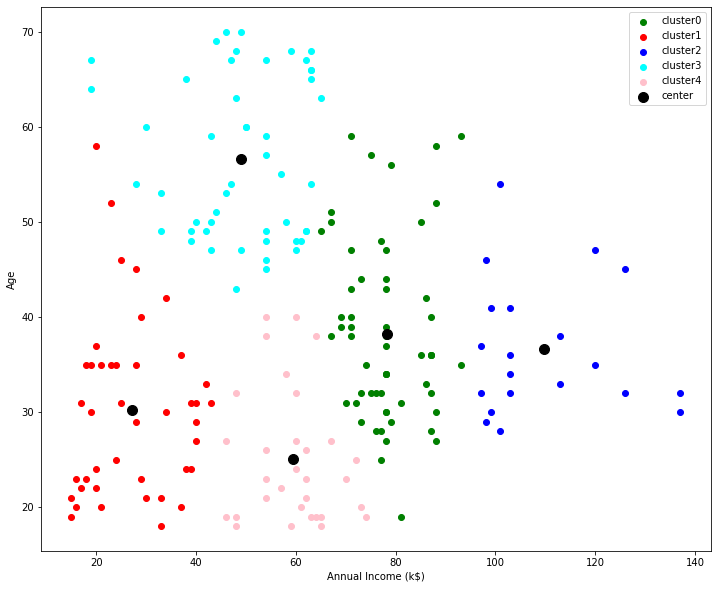

In [68]:
plt.figure(figsize=(12,10))
plt.scatter(df.loc[df['cluster']==0]['Annual Income (k$)'], df.loc[df['cluster']==0]['Age'], c='green', label='cluster0')
plt.scatter(df.loc[df['cluster']==1]['Annual Income (k$)'], df.loc[df['cluster']==1]['Age'], c='red', label='cluster1')
plt.scatter(df.loc[df['cluster']==2]['Annual Income (k$)'], df.loc[df['cluster']==2]['Age'], c='blue', label='cluster2')
plt.scatter(df.loc[df['cluster']==3]['Annual Income (k$)'], df.loc[df['cluster']==3]['Age'], c='cyan', label='cluster3')
plt.scatter(df.loc[df['cluster']==4]['Annual Income (k$)'], df.loc[df['cluster']==4]['Age'], c='pink', label='cluster4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='center')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.legend()
plt.show()